In [1]:
from transformers import pipeline
# Define pipeline
classifier = pipeline(task="zero-shot-classification", 
                      model="facebook/bart-large-mnli",
                      device=0) 

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

C:\Users\Leon\anaconda3\envs\NLP\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Leon\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [8]:
import pandas as pd
# Load the Sentiment140 dataset as a data frame
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = 'latin1', names=['polarity', 'id', 'date', 'query', 'user', 'text'])
# Print the first 5 rows of the data frame
print(f"\n The shape data is:{df.shape}")


 The shape data is:(1600000, 6)


In [35]:
data = df.copy()
len(data)

1600000

In [58]:
#all negative
data_1 = data[1:10001]
#all positive
data_2 = data[1590000:1600000]

In [59]:
len(data_1)

10000

In [60]:
# Concatenate the two data frames
data_3 = pd.concat([data_1, data_2], ignore_index=True)

# Shuffle the rows of the data frame
data_3 = data_3.sample(frac=1).reset_index(drop=True)

In [62]:
data_3

,polarity,id,date,query,user,text
0,4,2191700281,Tue Jun 16 05:48:21 PDT 2009,NO_QUERY,witenike,@manderrx27 I'm not sure what you'd call it......
1,4,2192812783,Tue Jun 16 07:35:09 PDT 2009,NO_QUERY,chipperlove,ew pink profile... but it matches my picture
2,4,2193525683,Tue Jun 16 08:34:36 PDT 2009,NO_QUERY,chrisbrown_023,"@physicshelpme Sorry, you're a day too late. I..."
3,4,2191483732,Tue Jun 16 05:22:16 PDT 2009,NO_QUERY,sampeet2929,@NickkkJonasss You were amazing at Wembley las...
4,0,1467998037,Mon Apr 06 23:11:06 PDT 2009,NO_QUERY,amitgupta,Have an invite for &quot;Healthy Dining&quot; ...
...,...,...,...,...,...,...
19995,0,1467948434,Mon Apr 06 22:57:05 PDT 2009,NO_QUERY,sftballlover45,Fell asleep . . . Really didn't mean too *chr...
19996,0,1468469027,Tue Apr 07 01:51:33 PDT 2009,NO_QUERY,madhattar,i still cant understand linked in. what sthe p...
19997,0,1548642937,Fri Apr 17 21:32:17 PDT 2009,NO_QUERY,nikkiburton,fat days are the worst. if men only knew what...
19998,4,2193221821,Tue Jun 16 08:09:45 PDT 2009,NO_QUERY,kathyxxxx,"@gregjames as long as you didnt wake her up, y..."


In [63]:
def score_Zero_shot(text):
  # Flair tokenization
  sequences = [text]
  # Define the candidate labels 
  candidate_labels = ["positive", "negative"]
  # Set the hyppothesis template
  hypothesis_template = "The sentiment of this review is {}."  

  # Prediction results
  hf_prediction = classifier(sequences, candidate_labels, hypothesis_template=hypothesis_template)
    
  # Return the score and the predicted label
  return hf_prediction 

In [64]:
from tqdm import tqdm
tqdm.pandas()
data_3['scores_Zero_shot'] = data_3['text'].progress_apply(lambda x: score_Zero_shot(x))

  0%|                                                                                        | 0/20000 [00:00<?, ?it/s]C:\Users\Leon\anaconda3\envs\NLP\lib\site-packages\transformers\pipelines\base.py:1043: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [23:44<00:00, 14.04it/s]


In [65]:
data_3

,polarity,id,date,query,user,text,scores_Zero_shot
0,4,2191700281,Tue Jun 16 05:48:21 PDT 2009,NO_QUERY,witenike,@manderrx27 I'm not sure what you'd call it......,[{'sequence': '@manderrx27 I'm not sure what y...
1,4,2192812783,Tue Jun 16 07:35:09 PDT 2009,NO_QUERY,chipperlove,ew pink profile... but it matches my picture,[{'sequence': 'ew pink profile... but it match...
2,4,2193525683,Tue Jun 16 08:34:36 PDT 2009,NO_QUERY,chrisbrown_023,"@physicshelpme Sorry, you're a day too late. I...","[{'sequence': '@physicshelpme Sorry, you're a ..."
3,4,2191483732,Tue Jun 16 05:22:16 PDT 2009,NO_QUERY,sampeet2929,@NickkkJonasss You were amazing at Wembley las...,[{'sequence': '@NickkkJonasss You were amazing...
4,0,1467998037,Mon Apr 06 23:11:06 PDT 2009,NO_QUERY,amitgupta,Have an invite for &quot;Healthy Dining&quot; ...,[{'sequence': 'Have an invite for &quot;Health...
...,...,...,...,...,...,...,...
19995,0,1467948434,Mon Apr 06 22:57:05 PDT 2009,NO_QUERY,sftballlover45,Fell asleep . . . Really didn't mean too *chr...,[{'sequence': 'Fell asleep . . . Really didn't...
19996,0,1468469027,Tue Apr 07 01:51:33 PDT 2009,NO_QUERY,madhattar,i still cant understand linked in. what sthe p...,[{'sequence': 'i still cant understand linked ...
19997,0,1548642937,Fri Apr 17 21:32:17 PDT 2009,NO_QUERY,nikkiburton,fat days are the worst. if men only knew what...,[{'sequence': 'fat days are the worst. if men...
19998,4,2193221821,Tue Jun 16 08:09:45 PDT 2009,NO_QUERY,kathyxxxx,"@gregjames as long as you didnt wake her up, y...",[{'sequence': '@gregjames as long as you didnt...


In [66]:
data_3['scores_Zero_shot_pos_or_neg'] = data_3['scores_Zero_shot'].progress_apply(lambda x: x[0]['labels'][0])

100%|████████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 799310.90it/s]


In [67]:
data_3['polarity'] = data_3['polarity'].progress_apply(lambda x: "negative" if x == 0 else "positive")

100%|███████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 1141245.10it/s]


In [68]:
data_3

,polarity,id,date,query,user,text,scores_Zero_shot,scores_Zero_shot_pos_or_neg
0,positive,2191700281,Tue Jun 16 05:48:21 PDT 2009,NO_QUERY,witenike,@manderrx27 I'm not sure what you'd call it......,[{'sequence': '@manderrx27 I'm not sure what y...,positive
1,positive,2192812783,Tue Jun 16 07:35:09 PDT 2009,NO_QUERY,chipperlove,ew pink profile... but it matches my picture,[{'sequence': 'ew pink profile... but it match...,negative
2,positive,2193525683,Tue Jun 16 08:34:36 PDT 2009,NO_QUERY,chrisbrown_023,"@physicshelpme Sorry, you're a day too late. I...","[{'sequence': '@physicshelpme Sorry, you're a ...",negative
3,positive,2191483732,Tue Jun 16 05:22:16 PDT 2009,NO_QUERY,sampeet2929,@NickkkJonasss You were amazing at Wembley las...,[{'sequence': '@NickkkJonasss You were amazing...,positive
4,negative,1467998037,Mon Apr 06 23:11:06 PDT 2009,NO_QUERY,amitgupta,Have an invite for &quot;Healthy Dining&quot; ...,[{'sequence': 'Have an invite for &quot;Health...,negative
...,...,...,...,...,...,...,...,...
19995,negative,1467948434,Mon Apr 06 22:57:05 PDT 2009,NO_QUERY,sftballlover45,Fell asleep . . . Really didn't mean too *chr...,[{'sequence': 'Fell asleep . . . Really didn't...,negative
19996,negative,1468469027,Tue Apr 07 01:51:33 PDT 2009,NO_QUERY,madhattar,i still cant understand linked in. what sthe p...,[{'sequence': 'i still cant understand linked ...,negative
19997,negative,1548642937,Fri Apr 17 21:32:17 PDT 2009,NO_QUERY,nikkiburton,fat days are the worst. if men only knew what...,[{'sequence': 'fat days are the worst. if men...,negative
19998,positive,2193221821,Tue Jun 16 08:09:45 PDT 2009,NO_QUERY,kathyxxxx,"@gregjames as long as you didnt wake her up, y...",[{'sequence': '@gregjames as long as you didnt...,positive


In [70]:
data_3["scores_Zero_shot_pos_or_neg"].value_counts()

negative    10681
positive     9319
Name: scores_Zero_shot_pos_or_neg, dtype: int64

In [72]:
from sklearn.metrics import classification_report
print(classification_report(data_3['polarity'],data_3['scores_Zero_shot_pos_or_neg']))

              precision    recall  f1-score   support

    negative       0.76      0.81      0.78     10000
    positive       0.79      0.74      0.77     10000

    accuracy                           0.77     20000
   macro avg       0.78      0.77      0.77     20000
weighted avg       0.78      0.77      0.77     20000



In [73]:
data_3['polarity'] = data_3['polarity'].progress_apply(lambda x: -1 if x == "negative" else 1)

100%|███████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 1077880.89it/s]


In [75]:
data_3['scores_Zero_shot_pos_or_neg'] = data_3['scores_Zero_shot_pos_or_neg'].progress_apply(lambda x: -1 if x == "negative" else 1)

100%|███████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 1108914.83it/s]


In [76]:
data_3

,polarity,id,date,query,user,text,scores_Zero_shot,scores_Zero_shot_pos_or_neg
0,1,2191700281,Tue Jun 16 05:48:21 PDT 2009,NO_QUERY,witenike,@manderrx27 I'm not sure what you'd call it......,[{'sequence': '@manderrx27 I'm not sure what y...,1
1,1,2192812783,Tue Jun 16 07:35:09 PDT 2009,NO_QUERY,chipperlove,ew pink profile... but it matches my picture,[{'sequence': 'ew pink profile... but it match...,-1
2,1,2193525683,Tue Jun 16 08:34:36 PDT 2009,NO_QUERY,chrisbrown_023,"@physicshelpme Sorry, you're a day too late. I...","[{'sequence': '@physicshelpme Sorry, you're a ...",-1
3,1,2191483732,Tue Jun 16 05:22:16 PDT 2009,NO_QUERY,sampeet2929,@NickkkJonasss You were amazing at Wembley las...,[{'sequence': '@NickkkJonasss You were amazing...,1
4,-1,1467998037,Mon Apr 06 23:11:06 PDT 2009,NO_QUERY,amitgupta,Have an invite for &quot;Healthy Dining&quot; ...,[{'sequence': 'Have an invite for &quot;Health...,-1
...,...,...,...,...,...,...,...,...
19995,-1,1467948434,Mon Apr 06 22:57:05 PDT 2009,NO_QUERY,sftballlover45,Fell asleep . . . Really didn't mean too *chr...,[{'sequence': 'Fell asleep . . . Really didn't...,-1
19996,-1,1468469027,Tue Apr 07 01:51:33 PDT 2009,NO_QUERY,madhattar,i still cant understand linked in. what sthe p...,[{'sequence': 'i still cant understand linked ...,-1
19997,-1,1548642937,Fri Apr 17 21:32:17 PDT 2009,NO_QUERY,nikkiburton,fat days are the worst. if men only knew what...,[{'sequence': 'fat days are the worst. if men...,-1
19998,1,2193221821,Tue Jun 16 08:09:45 PDT 2009,NO_QUERY,kathyxxxx,"@gregjames as long as you didnt wake her up, y...",[{'sequence': '@gregjames as long as you didnt...,1


In [78]:
from sklearn import metrics
y_true = data_3['polarity'] 

# Get the predicted labels
y_pred = data_3['scores_Zero_shot_pos_or_neg']
# Calculate the accuracy
accuracy = metrics.accuracy_score(y_true, y_pred)
# Calculate the precision
precision = metrics.precision_score(y_true, y_pred,pos_label=1)
# Calculate the recall
recall = metrics.recall_score(y_true, y_pred,pos_label=1)
# Calculate the F1 score
f1 = metrics.f1_score(y_true, y_pred,pos_label=1)
auc=metrics.roc_auc_score(y_true, y_pred)
cm = metrics.confusion_matrix(y_true,y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print('AUC score:', auc)
print('Confusion Matrix', cm)

Accuracy: 0.77435
Precision: 0.794398540615946
Recall: 0.7403
F1 score: 0.7663957761788912
AUC score: 0.77435
Confusion Matrix [[8084 1916]
 [2597 7403]]


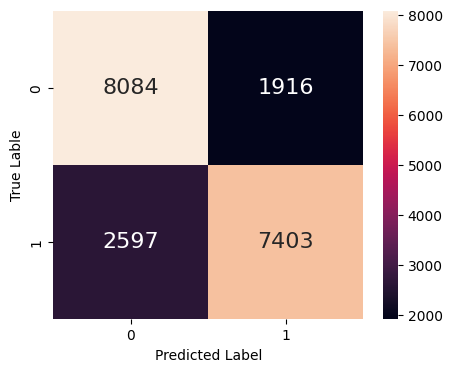

In [79]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,4))
# cm_df = pd.DataFrame(cm, index = ['Negative','Positive'], columns = ['Negative','Positive'])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size':16})
plt.xlabel("Predicted Label"); plt.ylabel('True Lable');

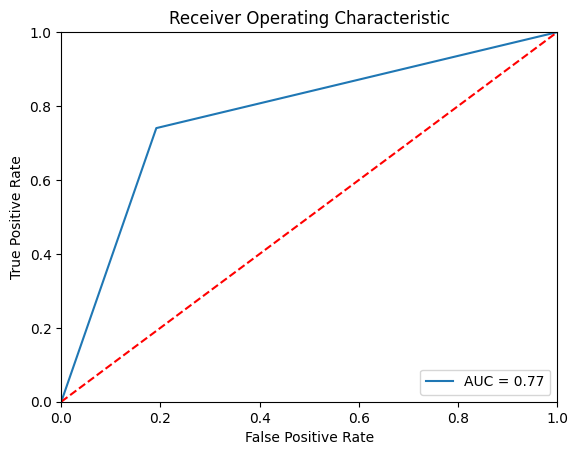

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

Let's use it on another data, where we have the label "neutral":

In [81]:
# Load the Sentiment140 dataset as a data frame
# Print the first 5 rows of the data frame
use_cols = ['airline_sentiment','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','text']
another_data_set = pd.read_csv('tweets.csv', index_col=None, usecols=use_cols)
another_data_set.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...


In [83]:
def score_Zero_shot(text):
  # Flair tokenization
  sequences = [text]
  # Define the candidate labels (added NEUTRAL)
  candidate_labels = ["positive", "neutral", "negative"]
  # Set the hyppothesis template
  hypothesis_template = "The sentiment of this review is {}."  

  # Prediction results
  hf_prediction = classifier(sequences, candidate_labels, hypothesis_template=hypothesis_template)
    
  # Return the score and the predicted label
  return hf_prediction 

In [84]:
another_data_set['scores_Zero_shot'] = another_data_set['text'].progress_apply(lambda x: score_Zero_shot(x))

  0%|                                                                                        | 0/14640 [00:00<?, ?it/s]C:\Users\Leon\anaconda3\envs\NLP\lib\site-packages\transformers\pipelines\base.py:1043: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████| 14640/14640 [28:55<00:00,  8.44it/s]


In [85]:
another_data_set

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,scores_Zero_shot
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,[{'sequence': '@VirginAmerica What @dhepburn s...
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,[{'sequence': '@VirginAmerica plus you've adde...
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,[{'sequence': '@VirginAmerica I didn't today.....
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,[{'sequence': '@VirginAmerica it's really aggr...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,[{'sequence': '@VirginAmerica and it's a reall...
...,...,...,...,...,...,...,...,...,...,...,...
14635,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,[{'sequence': '@AmericanAir thank you we got o...
14636,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,[{'sequence': '@AmericanAir leaving over 20 mi...
14637,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,[{'sequence': '@AmericanAir Please bring Ameri...
14638,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...","[{'sequence': '@AmericanAir you have my money,..."


In [86]:
another_data_set['scores_Zero_shot_pos_or_neg'] = another_data_set['scores_Zero_shot'].progress_apply(lambda x: x[0]['labels'][0])

100%|████████████████████████████████████████████████████████████████████████| 14640/14640 [00:00<00:00, 475028.90it/s]


In [89]:
another_data_set["scores_Zero_shot_pos_or_neg"].value_counts()

negative    9863
positive    4474
neutral      303
Name: scores_Zero_shot_pos_or_neg, dtype: int64

In [90]:
from sklearn.metrics import classification_report
print(classification_report(another_data_set['airline_sentiment'],another_data_set['scores_Zero_shot_pos_or_neg']))

              precision    recall  f1-score   support

    negative       0.84      0.90      0.87      9178
     neutral       0.66      0.06      0.12      3099
    positive       0.50      0.94      0.65      2363

    accuracy                           0.73     14640
   macro avg       0.67      0.64      0.55     14640
weighted avg       0.75      0.73      0.68     14640



In [94]:
from sklearn import metrics
y_true = another_data_set['airline_sentiment']

# Get the predicted labels
y_pred = another_data_set['scores_Zero_shot_pos_or_neg']
# Calculate the accuracy
accuracy = metrics.accuracy_score(y_true, y_pred)
# Calculate the precision
precision = metrics.precision_score(y_true, y_pred,average='weighted')
# Calculate the recall
recall = metrics.recall_score(y_true, y_pred,average='weighted')
# Calculate the F1 score
f1 = metrics.f1_score(y_true, y_pred,average='weighted')
# auc=metrics.roc_auc_score(y_true, y_pred, multi_class='ovr')
cm = metrics.confusion_matrix(y_true,y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print('AUC score:', auc)
print('Confusion Matrix', cm)

Accuracy: 0.7325819672131147
Precision: 0.7483586586392926
Recall: 0.7325819672131147
F1 score: 0.6766586327717307
AUC score: <function auc at 0x00000272C6ADD700>
Confusion Matrix [[8305   94  779]
 [1422  201 1476]
 [ 136    8 2219]]


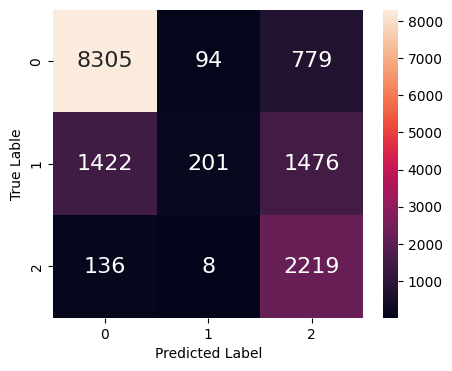

In [95]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,4))
# cm_df = pd.DataFrame(cm, index = ['Negative','Positive'], columns = ['Negative','Positive'])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size':16})
plt.xlabel("Predicted Label"); plt.ylabel('True Lable');

Let's make the same thing only on negative and positive:

In [96]:
# Load the Sentiment140 dataset as a data frame
# Print the first 5 rows of the data frame
use_cols = ['airline_sentiment','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','text']
another_data_set = pd.read_csv('tweets.csv', index_col=None, usecols=use_cols)
another_data_set.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...


In [98]:
another_data_set_copy = another_data_set.copy()

In [99]:
another_data_set_copy = another_data_set_copy[another_data_set_copy['airline_sentiment'] != 'neutral']

In [101]:
def score_Zero_shot(text):
  # Flair tokenization
  sequences = [text]
  # Define the candidate labels (added NEUTRAL)
  candidate_labels = ["positive", "negative"]
  # Set the hyppothesis template
  hypothesis_template = "The sentiment of this review is {}."  

  # Prediction results
  hf_prediction = classifier(sequences, candidate_labels, hypothesis_template=hypothesis_template)
    
  # Return the score and the predicted label
  return hf_prediction 

In [102]:
another_data_set_copy['scores_Zero_shot'] = another_data_set_copy['text'].progress_apply(lambda x: score_Zero_shot(x))

  0%|                                                                                        | 0/11541 [00:00<?, ?it/s]C:\Users\Leon\anaconda3\envs\NLP\lib\site-packages\transformers\pipelines\base.py:1043: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████| 11541/11541 [15:21<00:00, 12.52it/s]


In [103]:
another_data_set_copy['scores_Zero_shot_pos_or_neg'] = another_data_set_copy['scores_Zero_shot'].progress_apply(lambda x: x[0]['labels'][0])

100%|████████████████████████████████████████████████████████████████████████| 11541/11541 [00:00<00:00, 818036.00it/s]


In [104]:
from sklearn.metrics import classification_report
print(classification_report(another_data_set_copy['airline_sentiment'],another_data_set_copy['scores_Zero_shot_pos_or_neg']))

              precision    recall  f1-score   support

    negative       0.98      0.91      0.95      9178
    positive       0.74      0.94      0.83      2363

    accuracy                           0.92     11541
   macro avg       0.86      0.93      0.89     11541
weighted avg       0.93      0.92      0.92     11541



In [110]:
from sklearn import metrics
y_true = another_data_set_copy["airline_sentiment"] 

# Get the predicted labels
y_pred = another_data_set_copy['scores_Zero_shot_pos_or_neg']
# Calculate the accuracy
accuracy = metrics.accuracy_score(y_true, y_pred)
# Calculate the precision
precision = metrics.precision_score(y_true, y_pred,pos_label="negative")
# Calculate the recall
recall = metrics.recall_score(y_true, y_pred,pos_label="negative")
# Calculate the F1 score
f1 = metrics.f1_score(y_true, y_pred,pos_label="negative")
# auc=metrics.roc_auc_score(y_true, y_pred)
cm = metrics.confusion_matrix(y_true,y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print('AUC score:', auc)
print('Confusion Matrix', cm)

Accuracy: 0.9188111948704618
Precision: 0.9840244332197815
Recall: 0.9127260841141861
F1 score: 0.9470352156463738
AUC score: <function auc at 0x00000272C6ADD700>
Confusion Matrix [[8377  801]
 [ 136 2227]]


In [111]:
from sklearn import metrics
y_true = another_data_set_copy["airline_sentiment"] 

# Get the predicted labels
y_pred = another_data_set_copy['scores_Zero_shot_pos_or_neg']
# Calculate the accuracy
accuracy = metrics.accuracy_score(y_true, y_pred)
# Calculate the precision
precision = metrics.precision_score(y_true, y_pred,pos_label="positive")
# Calculate the recall
recall = metrics.recall_score(y_true, y_pred,pos_label="positive")
# Calculate the F1 score
f1 = metrics.f1_score(y_true, y_pred,pos_label="positive")
# auc=metrics.roc_auc_score(y_true, y_pred)
cm = metrics.confusion_matrix(y_true,y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print('AUC score:', auc)
print('Confusion Matrix', cm)

Accuracy: 0.9188111948704618
Precision: 0.7354689564068693
Recall: 0.9424460431654677
F1 score: 0.826191801150065
AUC score: <function auc at 0x00000272C6ADD700>
Confusion Matrix [[8377  801]
 [ 136 2227]]


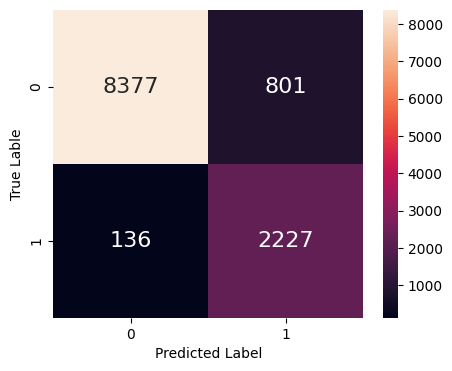

In [112]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,4))
# cm_df = pd.DataFrame(cm, index = ['Negative','Positive'], columns = ['Negative','Positive'])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size':16})
plt.xlabel("Predicted Label"); plt.ylabel('True Lable');

In [114]:
another_data_set_copy["airline_sentiment"] = another_data_set_copy["airline_sentiment"].progress_apply(lambda x: -1 if x == "negative" else 1)
another_data_set_copy['scores_Zero_shot_pos_or_neg'] = another_data_set_copy['scores_Zero_shot_pos_or_neg'].progress_apply(lambda x: -1 if x == "negative" else 1)

100%|███████████████████████████████████████████████████████████████████████| 11541/11541 [00:00<00:00, 1153826.01it/s]


In [115]:
y_true = another_data_set_copy["airline_sentiment"] 

# Get the predicted labels
y_pred = another_data_set_copy['scores_Zero_shot_pos_or_neg']

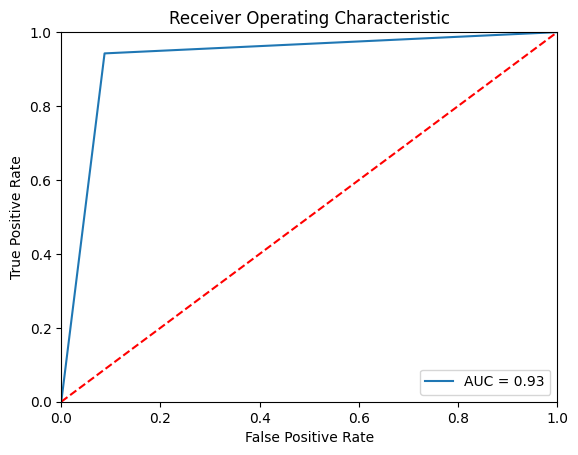

In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()